# 2022 NZMSA Data Science Submission.

In [64]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import datetime as dt

from sklearn.model_selection import train_test_split

%matplotlib inline

# Exploratory Data Analysis.

In [65]:
# The dataset "weather-data.csv" is obtained from IOWA Environmental Mesonet - Iowa State University.

# Column for this dataset:

# station: Acronym for the place of data capture.
# valid: Date and time of capture.
# tmpc: Temperature of the environment in celsius.
# dwpc: Temperature of the dew point in the environment in celsius.
# relh: Relative humidity of the environment in percentage.
# sknt: Wind Speed in knots.
# gust: Wind Gust in knots.
# peak_wind_drct: Peak Wind Gust Direction (from PK WND METAR remark). (deg).

dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [66]:
# Data Statistics:

# Mean - Average value of the data.
# std (Standard Deviation) - How far away from the mean is the overall data?
# 25% - The 25th percentile value.
# 50% - Median.
# 75% - The 75th percentile value.

dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


In [67]:
# Check that there are no null-values.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


<AxesSubplot:>

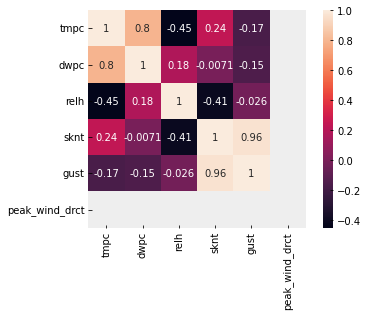

In [68]:
# Correlation plot.
# Values nearing one or negative one can have a pattern where a(x) = k*b(x)
# Values closer to the 0 value indicates the plot of a(x) and b(x) has no noticeable pattern.

sns.heatmap(dataset.corr(), annot=True, square=True)

In [69]:
# We see that the "valid" column is a date in an object type but we want to change it to a date format. 
dataset["valid"] = pd.to_datetime(dataset.valid)

dataset.info()
# we can see that the "valid" column is now a datetime format. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0    station        103713 non-null  object        
 1   valid           103713 non-null  datetime64[ns]
 2   tmpc            103678 non-null  float64       
 3   dwpc            103678 non-null  float64       
 4   relh            103593 non-null  float64       
 5   sknt            103704 non-null  float64       
 6   gust            1203 non-null    float64       
 7   peak_wind_drct  0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.3+ MB


/var/folders/g9/t_yf3bvs6db97xs362tz1bzm0000gn/T/ipykernel_93450/3415907984.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


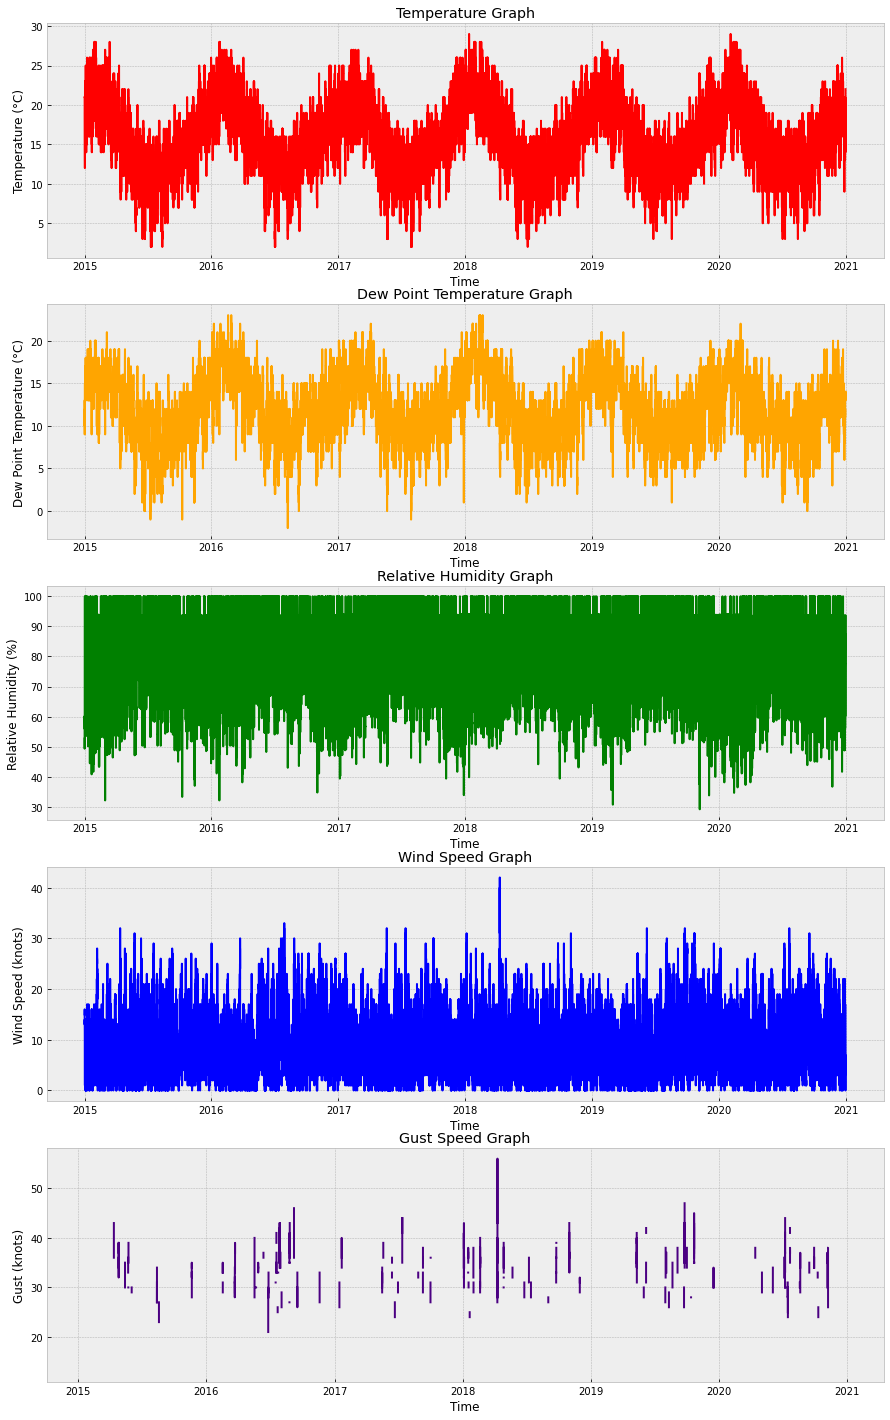

In [70]:
# Multiple graph plots.

plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, squeeze=True)

ax1.plot(dataset['valid'], dataset['tmpc'], color="red")
ax1.set_title("Temperature Graph")
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)")

ax2.plot(dataset['valid'], dataset['dwpc'], color="orange")
ax2.set_title("Dew Point Temperature Graph")
ax2.set_xlabel("Time")
ax2.set_ylabel("Dew Point Temperature (°C)")

ax3.plot(dataset['valid'], dataset['relh'], color="green")
ax3.set_title("Relative Humidity Graph")
ax3.set_xlabel("Time")
ax3.set_ylabel("Relative Humidity (%)")

ax4.plot(dataset['valid'], dataset['sknt'], color="blue")
ax4.set_title("Wind Speed Graph")
ax4.set_xlabel("Time")
ax4.set_ylabel("Wind Speed (knots)")

ax5.plot(dataset['valid'], dataset['gust'], color="indigo")
ax5.set_title("Gust Speed Graph")
ax5.set_xlabel("Time")
ax5.set_ylabel("Gust (knots)")

# I did not graph the peak_gust_wind column as it has no numerical values. 

fig.set_size_inches(15,25)

fig.show()

### Comments on the dataset:

- So we have been given a dataset of measurements of the weather taken at the NZAA station. The data includes date and time of measurement taken, temperature, dew point temperature, relative humidity, wind speed, gust speed and peak wind gust direction. Using this data, we will train a model to predict the weather. 


- The format of the data are as follows:
    - `station` is an object - no need to convert this. 
    - `valid` is an object - we can see that this field is a date, so I changed this to a date format which will be used in dealing with a time series. 
    - `tmpc`, `dwpc`, `relh`, `sknt`, `gust` and `peak_wind_drct` are in a float format. There is no need to convert these columns. 
    
    
- The `peak_wind_drct` column are all null values and have no relationship with any other columns, so can be removed. 

- The `gust` column have mostly null values, but there are some non-null values (1203 out of 103713). From the numerical graph, we can see that a lot of the data is missing. 


- From the correlation plot, we can see that there are relationships between the following fields:
    - `tmpc` and `dwpc` - strong positive relationship (0.8)
    - `sknt` and `gust` - strong positive relationship (0.96)
    - `tmpc` and `relh` - negative relationship (-0.45)
    - `relh` and `sknt` - negative relationship (-0.41)
    - all other relationships are weak. 
    
    
- From graphing the numerical data, we can see that there are clear yearly cyclic patterns in the `tmpc` and `dwpc` columns, which we can use to predict. This makes sense since the weather changes from summer where the temperature is the highest, to winter where the temperature is the lowest. 
    - The temperatures are highest around the start of the year, and lowest around the middle of the year. 
    - `tmpc` has an average of 15.81 degrees celcius, standard deviation of 4.24, a low of 2 degrees celcius, a high of 29 degrees celcius, a median of 16 degrees celcius, 25th percentile of 13 degrees celcius and a 75th percentile of 19 degrees celcius. 
    - `dwpc` has an average of 12.11 degrees celcius, standard deviation of 3.74, a low of -2 degrees celcius, a high of 23 degrees celcius, a median of 12 degrees celcius, 25th percentile of 9 degrees celcius and a 75th percentile of 15 degrees celcius. 
    - `dwpc` appears to be slightly colder than `tmpc` but there is a positive correlation - as `tmpc` increases, so does `dwpc`. 
    

### Part 1 Student Checklist:

- [x] know the format of the data
- [x] stats of the data: average, std, 25th/75th 
- [x] what did the correlation plot tell you?
- [x] what did the graphs tell you?


- [x] Comments as in what do you think about the overall EDA? 
- [x] Can any columns be predictable? 
- [x] What kind of data are you looking at?
- [x] Is there any pattern that is interesting in the EDA?

# Data Processing

In [71]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

In [72]:
# Cleaning the data

# When we check for null values, the 'peak_wind_drct' column are all NaN, so we can drop this column. 
# The 'gust' column also contains mostly NaN values so I have decided to also drop this column. 
# The 'station' column have entries all taken at NZAA station. This does not provide any useful information so we can also drop it. 
columns = [' station', 'peak_wind_drct', 'gust']
dataset.drop(columns, inplace=True, axis=1)

dataset.head()

,valid,tmpc,dwpc,relh,sknt
0,2015-01-01 00:00:00,21.0,11.0,52.77,15.0
1,2015-01-01 00:30:00,21.0,10.0,49.37,16.0
2,2015-01-01 01:00:00,21.0,12.0,56.38,16.0
3,2015-01-01 01:30:00,21.0,13.0,60.21,16.0
4,2015-01-01 02:00:00,21.0,12.0,56.38,16.0


In [73]:
# remove rows with NaN values. 
dataset.dropna(how='any', axis=0, subset=['tmpc', 'dwpc', 'relh', 'sknt'], inplace=True)

# Interpolate missing data
# dataset = dataset.fillna(dataset.interpolate())

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103584 entries, 0 to 103712
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   valid   103584 non-null  datetime64[ns]
 1   tmpc    103584 non-null  float64       
 2   dwpc    103584 non-null  float64       
 3   relh    103584 non-null  float64       
 4   sknt    103584 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.7 MB


In [74]:
# Convert Dataset to a form that a model can use. 

# # A model only takes in numbers so I separated the date info into integers. 
dataset['year'] = dataset['valid'].dt.year
dataset['month'] = dataset['valid'].dt.month
dataset['day'] = dataset['valid'].dt.day
dataset['hour'] = dataset['valid'].dt.hour
dataset['minute'] = dataset['valid'].dt.minute

dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103584 entries, 0 to 103712
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   valid   103584 non-null  datetime64[ns]
 1   tmpc    103584 non-null  float64       
 2   dwpc    103584 non-null  float64       
 3   relh    103584 non-null  float64       
 4   sknt    103584 non-null  float64       
 5   year    103584 non-null  int64         
 6   month   103584 non-null  int64         
 7   day     103584 non-null  int64         
 8   hour    103584 non-null  int64         
 9   minute  103584 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 8.7 MB


,valid,tmpc,dwpc,relh,sknt,year,month,day,hour,minute
0,2015-01-01 00:00:00,21.0,11.0,52.77,15.0,2015,1,1,0,0
1,2015-01-01 00:30:00,21.0,10.0,49.37,16.0,2015,1,1,0,30
2,2015-01-01 01:00:00,21.0,12.0,56.38,16.0,2015,1,1,1,0
3,2015-01-01 01:30:00,21.0,13.0,60.21,16.0,2015,1,1,1,30
4,2015-01-01 02:00:00,21.0,12.0,56.38,16.0,2015,1,1,2,0


In [75]:
# Now that there are no more NaN values in our dataset and our dataaset is useable, we can make the training and testing data.
# I will be looking at the temperature "tmpc" over time. 

X_train, X_test, y_train, y_test = train_test_split(dataset[["year","month","day","hour","minute"]], dataset[["tmpc"]], test_size=0.2)


In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82867 entries, 100400 to 34000
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    82867 non-null  int64
 1   month   82867 non-null  int64
 2   day     82867 non-null  int64
 3   hour    82867 non-null  int64
 4   minute  82867 non-null  int64
dtypes: int64(5)
memory usage: 3.8 MB


In [77]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20717 entries, 81120 to 90056
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    20717 non-null  int64
 1   month   20717 non-null  int64
 2   day     20717 non-null  int64
 3   hour    20717 non-null  int64
 4   minute  20717 non-null  int64
dtypes: int64(5)
memory usage: 971.1 KB


In [78]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82867 entries, 100400 to 34000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    82867 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB


In [79]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20717 entries, 81120 to 90056
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tmpc    20717 non-null  float64
dtypes: float64(1)
memory usage: 323.7 KB



### Part 2 Student Checklist:

- [x] Data deemed useless removed.
- [x] Dataset converted to a form that a model can use.
- [x] A train and test dataset for the model made.
- [x] State a reason for each changes made to the DataFrame.

# Data Modelling

In [80]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
score = model.score(X_test, y_test)
print(score)

0.14325302624677372


In [84]:
# Predict the temperature
predicted_temp = model.predict(dataset[["year","month","day","hour","minute"]])
prediction_df = pd.DataFrame(dataset["valid"])
prediction_df.insert(0, "predicted", predicted_temp)

prediction_df.head()


,predicted,valid
0,19.491196,2015-01-01 00:00:00
1,19.475350,2015-01-01 00:30:00
2,19.354674,2015-01-01 01:00:00
3,19.338828,2015-01-01 01:30:00
4,19.218152,2015-01-01 02:00:00


/var/folders/g9/t_yf3bvs6db97xs362tz1bzm0000gn/T/ipykernel_93450/3806847953.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


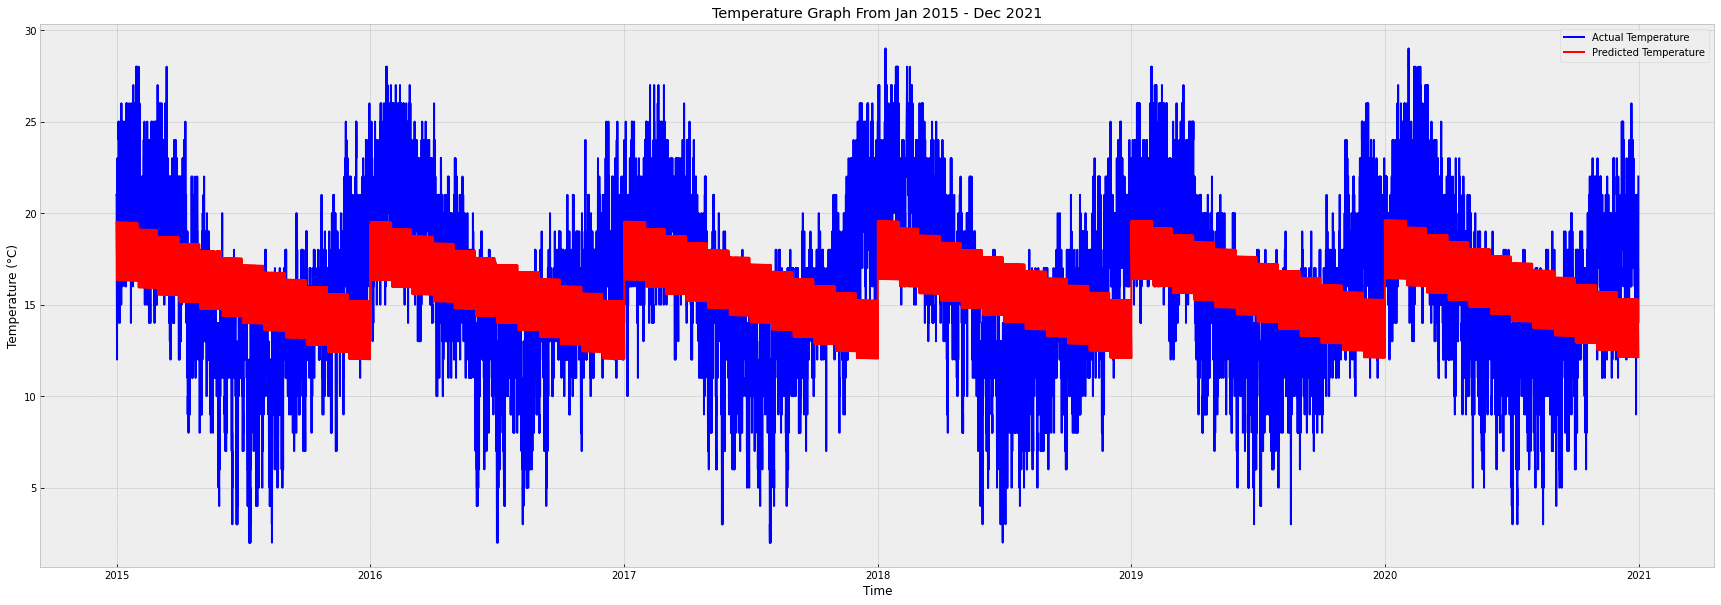

In [85]:
plt.style.use("bmh")
fig2, (ax1) = plt.subplots(nrows=1, ncols=1)

ax1.plot(dataset['valid'], dataset['tmpc'], color="blue")
ax1.plot(dataset['valid'], prediction_df['predicted'], color="red")
ax1.set_title("Temperature Graph From Jan 2015 - Dec 2021")
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)")
ax1.legend(['Actual Temperature', 'Predicted Temperature'])

fig2.set_size_inches(30,10)
fig2.show()

In [83]:
# Predict another month of the existing dataset.
# The last month of the dataset is 2020-12, so we will look at predicting 2021-01. 

# Generate the January dates in 30 minute intervals.
dates = pd.date_range(start = '2021-01-01', end = '2021-01-31', freq="30MIN")
jan_pred_df = pd.DataFrame()
jan_pred_df.insert(0, "date", dates)

jan_pred_df['year'] = jan_pred_df['date'].dt.year
jan_pred_df['month'] = jan_pred_df['date'].dt.month
jan_pred_df['day'] = jan_pred_df['date'].dt.day
jan_pred_df['hour'] = jan_pred_df['date'].dt.hour
jan_pred_df['minute'] = jan_pred_df['date'].dt.minute

# Predict the temperature using the model
predicted_temp = model.predict(jan_pred_df[["year","month","day","hour","minute"]])
jan_pred_df.insert(6, "predicted", predicted_temp)

jan_pred_df.head()

,date,year,month,day,hour,minute,predicted
0,2021-01-01 00:00:00,2021,1,1,0,0,19.624903
1,2021-01-01 00:30:00,2021,1,1,0,30,19.609057
2,2021-01-01 01:00:00,2021,1,1,1,0,19.488381
3,2021-01-01 01:30:00,2021,1,1,1,30,19.472535
4,2021-01-01 02:00:00,2021,1,1,2,0,19.351859


/var/folders/g9/t_yf3bvs6db97xs362tz1bzm0000gn/T/ipykernel_93450/3262236436.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


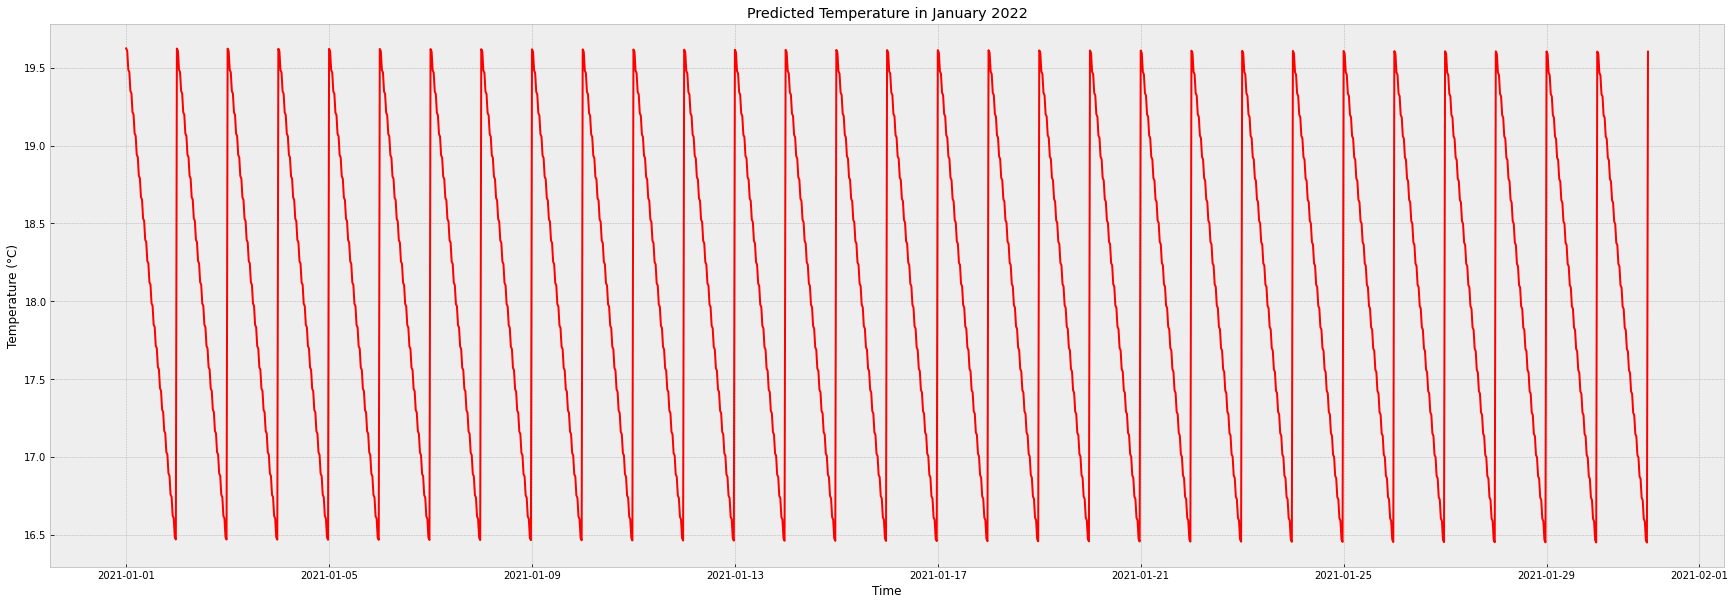

In [86]:
# plotting the prediction

plt.style.use("bmh")
fig3, (ax1) = plt.subplots(nrows=1, ncols=1)

ax1.plot(jan_pred_df['date'], jan_pred_df['predicted'], color="red")
ax1.set_title("Predicted Temperature in January 2022")
ax1.set_xlabel("Time")
ax1.set_ylabel("Temperature (°C)")

fig3.set_size_inches(30,10)
fig3.show()

# Conclusion

* [x] Comment on your model performance.
* [x] Anything interesting about the data analysis.

I have fitted a linear model. 

Accuracy is around 13%-15.5% which is better than I expected. 

Interesting observations from predicting the temperature is that the predicted graph has a zig-zag shape. Highest temperature at the start of the year and lowest at the end of the year. There is a jump from the lowest temperature at the end of the year to the highest temperature at the start of the year. This is not what we expected from the trends of actual seasonal temperature where in the summer it is the hottest and in the winter it is the coldest. 

In conclusion, this is not a reliable model and should not be used to predict the future weather.  

### Part 3 Student Checklist

- [x] Model selected
- [x] Training dataset scored.
- [x] Another month of the existing dataset predicted.
- [x] Model evaluation in a paragraph.